In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# To run sql queries on DataFrame

import pandasql as psql

In [2]:
loandata = pd.read_csv(r"C:\Users\tarun\Downloads\loan_data.csv",header = 0)

loandata_bk = loandata.copy()

loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loandata.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [5]:
loandata = loandata.rename(columns = {'not.fully.paid':'NFPaid'},inplace = False)

#loandata.columns = loandata.columns.str.replace(".","_")

loandata_bk2 = loandata.copy()

loandata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
Target_count = loandata.NFPaid.value_counts()
print('Class 0:',Target_count[0])
print('Class 1:',Target_count[1])
print('Proportion:',round(Target_count[0]/Target_count[1],2),': 1')
print('Total loans trans:',len(loandata))

Class 0: 8045
Class 1: 1533
Proportion: 5.25 : 1
Total loans trans: 9578


In [7]:
loandata['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [8]:
#converting the categorical data to numerical data using LabelEncoder

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

loandata['purpose'] = LE.fit_transform(loandata['purpose'])

In [9]:
loandata

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [10]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int32  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  NFPaid             9578 non-null   int64  
dtypes: float64(6), int32(1), int64(7)
memory usage: 1010.3 KB


In [11]:
IndepVar = []
for col in loandata.columns:
    if col != 'NFPaid':
        IndepVar.append(col)
        
TargetVar = 'NFPaid'

x = loandata[IndepVar]
y = loandata[TargetVar]

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state =21)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6704, 13), (2874, 13), (6704,), (2874,))

In [13]:
#scalling the feature by using MinMaxScalar

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range = (0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# Random Forest Algorithm

Confusion matrix : 
 [[  17  474]
 [  35 2348]]
Outcome values : 
 17 474 35 2348
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.03      0.06       491
           0       0.83      0.99      0.90      2383

    accuracy                           0.82      2874
   macro avg       0.58      0.51      0.48      2874
weighted avg       0.75      0.82      0.76      2874

Accuracy : 82.3 %
Precision : 32.7 %
Recall : 3.5 %
F1 Score : 0.063
Specificity or True Negative Rate : 98.5 %
Balanced Accuracy : 51.0 %
MCC : 0.056
roc_auc_score: 0.51


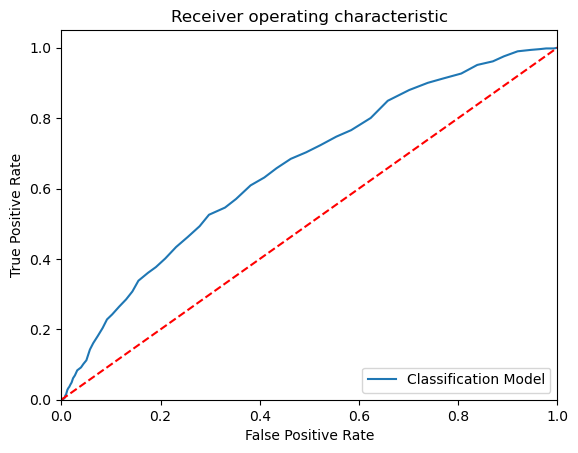

-------------------------------------------------------------------------------------------------------------------


In [16]:
from sklearn.ensemble import RandomForestClassifier

#create an object for model

ModelRF = RandomForestClassifier()

ModelRF.fit(x_train,y_train)

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-------------------------------------------------------------------------------------------------------------------')

# Decision Tree Algorithm

Confusion matrix : 
 [[ 152  339]
 [ 508 1875]]
Outcome values : 
 152 339 508 1875
Classification report : 
               precision    recall  f1-score   support

           1       0.23      0.31      0.26       491
           0       0.85      0.79      0.82      2383

    accuracy                           0.71      2874
   macro avg       0.54      0.55      0.54      2874
weighted avg       0.74      0.71      0.72      2874

Accuracy : 70.5 %
Precision : 23.0 %
Recall : 31.0 %
F1 Score : 0.264
Specificity or True Negative Rate : 78.7 %
Balanced Accuracy : 54.8 %
MCC : 0.086
roc_auc_score: 0.548


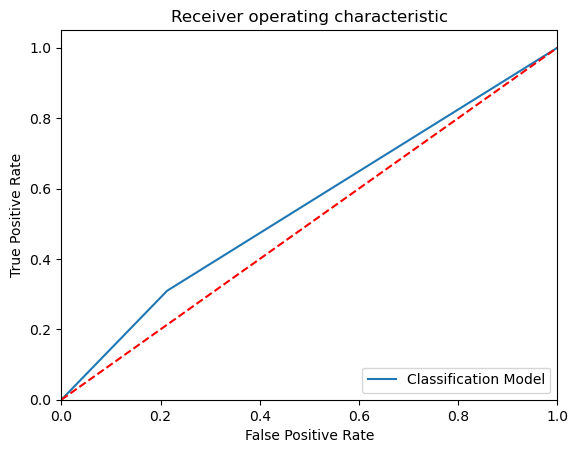

-----------------------------------------------------------------------------------------------------


In [18]:
from sklearn.tree import DecisionTreeClassifier

#create an object for model

ModelDT = DecisionTreeClassifier()

ModelDT.fit(x_train,y_train)

y_pred = ModelDT.predict(x_test)
y_pred_prob = ModelDT.predict_proba(x_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDT.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

# Extra Trees Algorithm

Confusion matrix : 
 [[  19  472]
 [  30 2353]]
Outcome values : 
 19 472 30 2353
Classification report : 
               precision    recall  f1-score   support

           1       0.39      0.04      0.07       491
           0       0.83      0.99      0.90      2383

    accuracy                           0.83      2874
   macro avg       0.61      0.51      0.49      2874
weighted avg       0.76      0.83      0.76      2874

Accuracy : 82.5 %
Precision : 38.8 %
Recall : 3.9 %
F1 Score : 0.07
Specificity or True Negative Rate : 98.7 %
Balanced Accuracy : 51.3 %
MCC : 0.076
roc_auc_score: 0.513


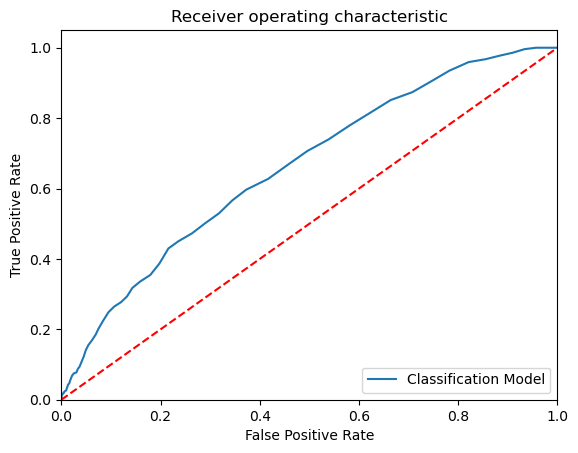

-----------------------------------------------------------------------------------------------------


In [22]:
from sklearn.ensemble import ExtraTreesClassifier

#create an object for model

ModelET = ExtraTreesClassifier()

ModelET.fit(x_train,y_train)

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [19]:
Results = pd.DataFrame({'NFPaid_A':y_test,'NFPaid_P':y_pred})

ResultsFinal = loandata_bk2.merge(Results,left_index = True,right_index = True)

ResultsFinal.sample(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFPaid,NFPaid_A,NFPaid_P
8401,0,debt_consolidation,0.1418,188.46,11.156251,19.46,657,2010.041667,12053,28.50,0,0,0,1,1,0
5381,1,all_other,0.1253,160.64,9.505991,2.05,717,3090.000000,1554,23.90,2,0,0,0,0,0
3726,1,debt_consolidation,0.1379,211.27,10.596535,9.00,682,5400.000000,4480,81.50,3,0,0,0,0,0
5626,1,all_other,0.1148,65.94,10.819778,12.03,712,4170.000000,4005,58.19,1,0,0,0,0,0
9138,0,credit_card,0.0963,128.38,11.599066,24.50,722,7409.958333,139544,70.10,1,0,0,0,0,0
5080,1,small_business,0.1496,788.18,11.002100,7.30,782,4619.958333,2247,18.60,0,0,0,1,1,0
5224,1,debt_consolidation,0.1496,840.15,11.183518,12.19,702,5100.000000,34665,94.70,0,0,0,0,0,0
7938,0,debt_consolidation,0.1407,136.00,10.736397,13.51,642,1708.958333,4033,53.10,8,0,0,0,0,0
7469,1,educational,0.0714,241.33,10.491274,15.27,792,7650.000000,4249,21.40,0,0,0,0,0,1
2486,1,all_other,0.1726,644.12,11.525842,14.42,662,7170.000000,3781,16.30,3,0,0,0,0,1
